## Анализ пользователей мобильных устройств

**Цель**: 1. Выявить зависимость между количеством установок приложения и другими аспектами (модель телефона, возраст и т.д.). 2. Предоставить данные по сегментам пользователя (среднее время активности в приложении, количество приложений на устройстве и т.д.) 3. Проверить гипотезы. №1 Женщины устанавливают больше приложений чем мужчины, №2 У женщин активность экрана выше чем у мужчин

Датафрейм был получен из открытого источника <https://www.kaggle.com/datasets/valakhorasani/mobile-device-usage-and-user-behavior-dataset/data> 

Описание данных к файлу `user_behavior.csv` 

 - `User ID`: уникальный идентификатор для каждого пользователя.
 - `Device Model`: модель смартфона пользователя.
 - `Operating System`: операционная система устройства (iOS или Android).
 - `App Usage Time (min/day)`: ежедневное время, затрачиваемое на мобильные приложения, измеряемое в минутах.
 - `Screen On Time (hours/day)`: среднее количество часов в день, когда экран активен.
 - `Battery Drain (mAh/day)`: ежедневный расход батареи в мАч.
 - `Number of Apps Installed`: общее количество приложений, доступных на устройстве.
 - `Data Usage (MB/day)`: ежедневное потребление мобильных данных в мегабайтах.
 - `Age`: возраст пользователя.
 - `Gender`: пол пользователя (мужчина или женщина).
 - `User Behavior Class`: классификация поведения пользователя на основе моделей использования (от 1 до 5).

## Изучение общей информации

In [1]:
#импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

#игнорируем ошибки
import warnings
warnings.filterwarnings('ignore')

#выводим столбцы и строки полностью, формат округлен
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

#выводим значения без сокращений
pd.set_option('display.max_colwidth', None)

In [2]:
#читаем и сохраняем датафрейм
df = pd.read_csv('user_behavior.csv')

In [3]:
#выводим общую информацию
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


In [4]:
#выводим первые пять строк датафрейма
df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.40,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.70,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.00,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.80,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.30,1367,58,988,31,Female,3


In [5]:
#проверяем наличие дубликатов
df.duplicated().sum()

0

In [6]:
#напишем функцию, которая выведет уникальные значения для всех столбцов

def col_unique(data):
    ''' На вход передаем текущий фрейм и создаем стобец в который попадут уникальные значения
    и  их количество. Переворачиваем таблицу для удобства чтения и сортируем в порядке возрастания'''
    
    df = data
    values = pd.DataFrame()
    
    for col in df.columns:
        values[col] = [df[col].unique(), df[col].nunique()]
    
    return values.transpose().sort_values(by=1, ascending=True).rename(
        {0:'Уникальные значения', 1:'Кол-во уникальных значений'}, axis=1)


In [7]:
col_unique(df)

,Уникальные значения,Кол-во уникальных значений
Operating System,"[Android, iOS]",2
Gender,"[Male, Female]",2
Device Model,"[Google Pixel 5, OnePlus 9, Xiaomi Mi 11, iPhone 12, Samsung Galaxy S21]",5
User Behavior Class,"[4, 3, 2, 5, 1]",5
Age,"[40, 47, 42, 20, 31, 21, 34, 24, 57, 43, 49, 39, 44, 26, 29, 45, 23, 37, 58, 52, 33, 55, 19, 25, 38, 56, 18, 22, 27, 54, 53, 30, 28, 50, 51, 41, 32, 35, 36, 59, 48, 46]",42
Number of Apps Installed,"[67, 42, 32, 56, 58, 35, 66, 82, 75, 17, 47, 65, 43, 53, 84, 41, 16, 89, 37, 46, 59, 38, 77, 78, 44, 55, 14, 81, 19, 30, 93, 74, 52, 83, 39, 21, 96, 97, 25, 90, 61, 28, 10, 64, 85, 87, 48, 57, 98, 11, 29, 99, 22, 63, 31, 24, 72, 73, 91, 18, 15, 45, 12, 26, 33, 76, 34, 13, 49, 71, 68, 69, 94, 92, 36, 79, 88, 27, 51, 23, 86, 95, 50, 70, 54, 62]",86
Screen On Time (hours/day),"[6.4, 4.7, 4.0, 4.8, 4.3, 2.0, 7.3, 11.4, 7.7, 6.6, 1.4, 5.5, 6.2, 4.9, 5.4, 10.4, 3.6, 5.8, 8.5, 2.6, 11.6, 6.5, 5.6, 3.4, 7.6, 10.5, 6.8, 6.0, 4.6, 10.2, 1.2, 3.3, 11.2, 10.1, 2.1, 3.7, 2.4, 10.9, 8.4, 8.2, 8.7, 7.4, 5.9, 2.7, 2.2, 1.6, 1.1, 7.0, 7.1, 11.9, 7.5, 1.9, 11.5, 4.5, 1.7, 7.2, 9.0, 6.3, 5.7, 2.5, 1.8, 10.6, 2.8, 1.5, 4.1, 9.5, 12.0, 4.2, 3.8, 8.6, 5.1, 3.2, 7.9, 5.2, 10.0, 8.1, 11.8, 10.8, 1.0, 11.3, 9.7, 11.1, 5.3, 9.4, 7.8, 9.2, 10.7, 4.4, 8.9, 1.3, 3.1, 9.3, 6.1, 6.9, 9.6, 2.3, 11.7, 3.5, 5.0, 2.9, ...]",108
App Usage Time (min/day),"[393, 268, 154, 239, 187, 99, 350, 543, 340, 424, 53, 215, 462, 189, 503, 132, 299, 81, 577, 93, 576, 423, 292, 216, 91, 444, 512, 452, 412, 260, 197, 278, 46, 593, 32, 122, 522, 473, 398, 240, 120, 152, 138, 502, 558, 580, 589, 245, 125, 97, 516, 68, 64, 539, 428, 325, 309, 79, 545, 459, 225, 257, 134, 82, 521, 457, 31, 47, 229, 34, 173, 78, 230, 565, 172, 330, 39, 223, 404, 151, 137, 301, 116, 291, 84, 411, 326, 550, 59, 41, 183, 174, 274, 166, 66, 54, 95, 488, 295, 136, ...]",387
Data Usage (MB/day),"[1122, 944, 322, 871, 988, 564, 1054, 1702, 1053, 1301, 162, 641, 1099, 857, 779, 2025, 344, 985, 297, 2192, 302, 1553, 1372, 949, 748, 451, 1002, 1599, 1456, 1384, 889, 975, 917, 105, 1616, 153, 573, 2328, 1400, 1180, 708, 2323, 392, 429, 572, 1935, 1594, 323, 2262, 1997, 1417, 885, 393, 375, 2189, 111, 161, 2415, 1144, 1663, 1253, 128, 1717, 1091, 912, 449, 1547, 284, 1090, 1701, 1082, 208, 125, 122, 301, 138, 989, 1603, 549, 1133, 695, 1352, 276, 348, 1303, 307, 827, 367, 1083, 1454, 1946, 1968, 293, 875, 136, 738, 565, 934, 360, 264, ...]",585
Battery Drain (mAh/day),"[1872, 1331, 761, 1676, 1367, 940, 1802, 2956, 2138, 1957, 435, 1690, 2303, 1662, 1754, 2571, 628, 1431, 558, 2774, 681, 2803, 2094, 1401, 1711, 1073, 2372, 2409, 2387, 1899, 1361, 1660, 1484, 457, 2499, 580, 755, 2808, 2312, 1851, 1464, 2447, 720, 993, 837, 2476, 889, 2623, 2736, 2180, 1243, 690, 1101, 2857, 450, 572, 2796, 2306, 2269, 2798, 2292, 493, 2911, 1982, 1420, 1705, 773, 2932, 1808, 2902, 2347, 585, 476, 1305, 678, 333, 1254, 2475, 1035, 2363, 368, 1311, 2081, 1003, 345, 839, 2053, 912, 1474, 501, 1125, 2169, 2243, 2916, 2406, 361, 1526, 389, 1210, 929, ...]",628


In [8]:
#ознакомимся со значениями датафрейма
df.describe()

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
count,700.00,700.00,700.00,700.00,700.00,700.00,700.00,700.00
mean,350.50,271.13,5.27,"1,525.16",50.68,929.74,38.48,2.99
std,202.22,177.20,3.07,819.14,26.94,640.45,12.01,1.40
min,1.00,30.00,1.00,302.00,10.00,102.00,18.00,1.00
25%,175.75,113.25,2.50,722.25,26.00,373.00,28.00,2.00
50%,350.50,227.50,4.90,"1,502.50",49.00,823.50,38.00,3.00
75%,525.25,434.25,7.40,"2,229.50",74.00,"1,341.00",49.00,4.00
max,700.00,598.00,12.00,"2,993.00",99.00,"2,497.00",59.00,5.00


_Мы ознакомились с датафреймом и можем сделать следующие выводы:_

_1. В датафрейме представлены данные для 700 уникальных пользователей_

_2. Нет пропусков, все столбцы имеют корректные типы данных_

_3. В данных нет выбросов и аномалий_

_4. Наименование столбцов необходимо привести к змеиному типу_

_5. Данные собраны для 5 моделей телефонов, 2 операционные системы, 2 гендера, также в датафрейме все пользователи уже сегментированы_

## Предобработка данных

In [9]:
#приведём наименование столбцов к "змеиному" типу
df.columns = df.columns.str.lower()
df = df.rename(columns=lambda x: x.replace(' ', '_'))
df.head()

,user_id,device_model,operating_system,app_usage_time_(min/day),screen_on_time_(hours/day),battery_drain_(mah/day),number_of_apps_installed,data_usage_(mb/day),age,gender,user_behavior_class
0,1,Google Pixel 5,Android,393,6.40,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.70,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.00,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.80,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.30,1367,58,988,31,Female,3



## Исследовательский анализ данных

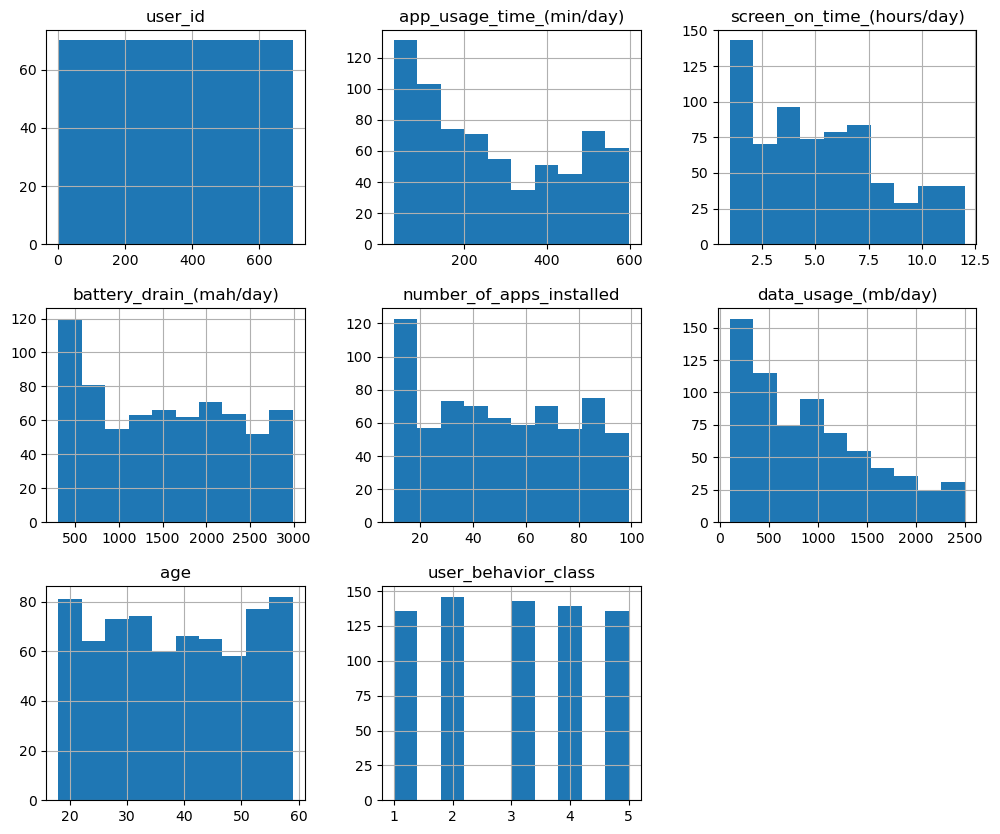

In [10]:
#посмотрим на распределение количественных данных
df.hist(bins=10, figsize=(12, 10))
plt.show()

_Из гистограмм видно, что практически одинаково распределены данные в столбцах `user_behavior_class`, `age`. В остальных столбцах пользователи чаще всего: `app_usage_time_(min/day)` проводят в приложениях до 100 минут/в день, `screen_on_time_(hours/day)` - до 2х часов в день активный экран, `battery_drain_(mah/day)` до 500 мАп/день тратят заряд батареи, `number_of_apps_installed` до 20 приложений установлено, `data_usage_(mb/day)` используют до 250 МБ в день интернет трафика._

In [11]:
#посмотрим на распределение по гендеру
gender = df['gender'].value_counts()
gender

Male      364
Female    336
Name: gender, dtype: int64

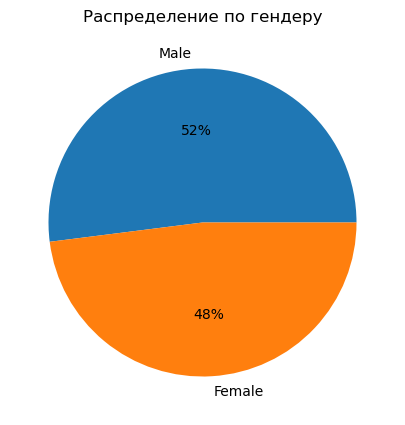

In [12]:
gender.plot(kind='pie', title='Распределение по гендеру', figsize=(8,5), autopct='%1.0f%%')
plt.ylabel('')
plt.show()

_Распределение практически одинаково_

In [13]:
#посмотрим на распределение по операционной системе
system = df['operating_system'].value_counts()
system

Android    554
iOS        146
Name: operating_system, dtype: int64

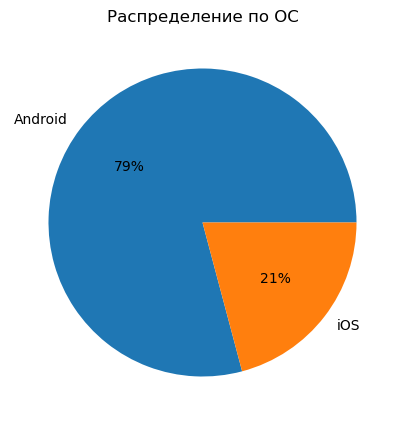

In [14]:
system.plot(kind='pie', title='Распределение по ОС', figsize=(8,5), autopct='%1.0f%%')
plt.ylabel('')
plt.show()

_Больше всего пользователи используют гаджеты с ОС Android_

In [15]:
#посмотрим на распределение по моделям
device = df['device_model'].value_counts()
device

Xiaomi Mi 11          146
iPhone 12             146
Google Pixel 5        142
OnePlus 9             133
Samsung Galaxy S21    133
Name: device_model, dtype: int64

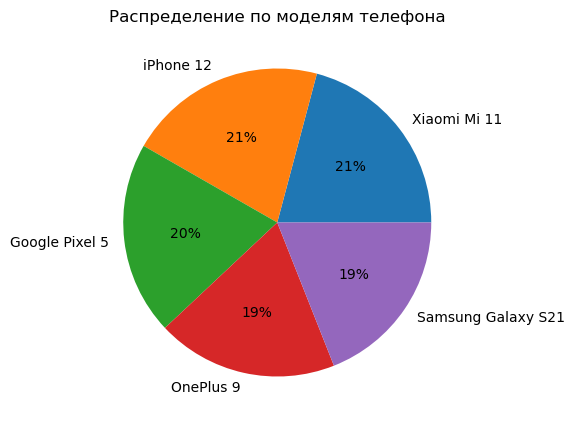

In [16]:
device.plot(kind='pie', title='Распределение по моделям телефона', figsize=(8,5), autopct='%1.0f%%')
plt.ylabel('')
plt.show()

_Модели девайсов распределены в одинаковом процентом соотношении_

## Корреляция


In [17]:
#копируем датафрейм
df1 = df.copy()

In [18]:
#копируем столбцы с категориальными данными, чтобы применить к ним функция .get_dummies
df1['gender_bin'] = df1['gender'].copy()
df1['operating_system_bin'] = df1['operating_system'].copy()
df1['device_model_bin'] = df1['device_model'].copy()

In [19]:
#применяем функцию к датафрейму
df1 = pd.get_dummies(df1, columns=['gender_bin', 'operating_system_bin', 'device_model_bin'])

#переименовуем столбцы
df1 = df1.rename(columns = ({'gender_bin_Female':'female', 'gender_bin_Male':'male',
                             'operating_system_bin_Android':'android', 'operating_system_bin_iOS':'ios',
                             'device_model_bin_Google Pixel 5':'google_pixel5',
                            'device_model_bin_OnePlus 9':'one_plus9',
                            'device_model_bin_Samsung Galaxy S21' : 'samsung_galaxy_s21',
                            'device_model_bin_Xiaomi Mi 11' : 'xiaomi_mi_11',
                            'device_model_bin_iPhone 12' : 'iphone12'}))
#проверим вывод таблицы
df1.head()

,user_id,device_model,operating_system,app_usage_time_(min/day),screen_on_time_(hours/day),battery_drain_(mah/day),number_of_apps_installed,data_usage_(mb/day),age,gender,user_behavior_class,female,male,android,ios,google_pixel5,one_plus9,samsung_galaxy_s21,xiaomi_mi_11,iphone12
0,1,Google Pixel 5,Android,393,6.40,1872,67,1122,40,Male,4,0,1,1,0,1,0,0,0,0
1,2,OnePlus 9,Android,268,4.70,1331,42,944,47,Female,3,1,0,1,0,0,1,0,0,0
2,3,Xiaomi Mi 11,Android,154,4.00,761,32,322,42,Male,2,0,1,1,0,0,0,0,1,0
3,4,Google Pixel 5,Android,239,4.80,1676,56,871,20,Male,3,0,1,1,0,1,0,0,0,0
4,5,iPhone 12,iOS,187,4.30,1367,58,988,31,Female,3,1,0,0,1,0,0,0,0,1


In [20]:
#считаем корреляцию к столбцу "number_of_apps_installed"

df1.corrwith(df1['number_of_apps_installed']).sort_values(key=abs)

samsung_galaxy_s21            0.00
age                           0.00
one_plus9                    -0.01
xiaomi_mi_11                 -0.01
google_pixel5                -0.01
female                       -0.02
male                          0.02
user_id                      -0.02
ios                           0.04
iphone12                      0.04
android                      -0.04
data_usage_(mb/day)           0.93
screen_on_time_(hours/day)    0.95
app_usage_time_(min/day)      0.96
battery_drain_(mah/day)       0.96
user_behavior_class           0.98
number_of_apps_installed      1.00
dtype: float64

**Из полученной таблицы, мы можем сделать вывод, что нет зависимости между количеством установленных приложением и гендером, возрастом пользователя, а также моделью телефона и ОС которой он пользуется. Мы видим корреляцию более 90% с такими данными как: класс пользователя, исспользование зарада батареи, интернет трафика, активности экрана и время проведения в приложении.**

In [21]:
#сгруппируем данные по классу пользователя и получим общую информацию для каждого класса

grouped = (df1
           .groupby('user_behavior_class')
           .agg({'app_usage_time_(min/day)' : 'mean',
                 'screen_on_time_(hours/day)' : 'mean',
                 'battery_drain_(mah/day)' : 'mean',
                 'number_of_apps_installed' : 'mean',
                 'data_usage_(mb/day)' : 'mean'}
                 )
           .reset_index()
          )
grouped

,user_behavior_class,app_usage_time_(min/day),screen_on_time_(hours/day),battery_drain_(mah/day),number_of_apps_installed,data_usage_(mb/day)
0,1,60.43,1.49,454.98,14.56,202.32
1,2,131.97,3.04,883.81,30.75,451.42
2,3,235.40,4.96,"1,515.06",50.00,822.01
3,4,395.75,6.91,"2,105.81",69.92,"1,232.23"
4,5,541.42,10.11,"2,701.01",89.25,"1,974.77"


**Из полученной таблицы мы видим, чем больше пользователь устанавливает приложений, тем больше тратит интернет трафика, времени активности, заряда батареи, что является логичным.** 

## Проверка гипотезы

**Гипотеза №1**

**H_0**: женщины и мужчины устанавливают одинаковое количество приложений;

**H_1**: женщины устанавливают приложений больше.

Для проверки гипотезы мы можем использовать t-test, который должен соответствовать условиям: 

1. Генеральные совокупности не зависят друг от друга.
2. Выборочные средние нормально распределены.
3. Дисперсии рассматриваемых генеральных совокупностей равны.

In [24]:
#создадим две выборки
male = df1.query('gender == "Male"')['number_of_apps_installed']
female = df1.query('gender == "Female"')['number_of_apps_installed']

In [25]:
#проверяем соотвествие данных на нормальное распределение для выборки Male

alpha = 0.01 #критический уровень статистической значимости  

shapiro_test_stat, p_value = st.shapiro(male)

print('p-значение: ', p_value)
if p_value < alpha:
    print('Распределение не нормально')
else:
    print('Нормальное распределение')  

p-значение:  1.8415371658142554e-11
Распределение не нормально


In [26]:
#проверяем соотвествие данных на нормальное распределение Female

alpha = 0.01 #критический уровень статистической значимости  

shapiro_test_stat, p_value = st.shapiro(female)

print('p-значение: ', p_value)
if p_value < alpha:
    print('Распределение не нормально')
else:
    print('Нормальное распределение')  

p-значение:  1.7486535552890814e-09
Распределение не нормально


In [27]:
#проверим дисперсии выборок

print(df1.query('gender == "Male"')['number_of_apps_installed'].var())
print(df1.query('gender == "Female"')['number_of_apps_installed'].var())

756.0419807465261
695.0949538024166


_Так как данные распределены ненормально и дисперсии не равны, будем использовать непараметрический тест Манна-Уитни (U-тест)_

In [30]:
# Проводим тест Манна-Уитни:
u_statistic, p_value = st.mannwhitneyu(female, male, alternative='greater')

# Выводим результат:
print(f"Статистика U: {u_statistic}")
print(f"p-значение: {p_value}")

# Оценка уровня значимости (α = 0.05)
alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу. Есть доказательства, что женщины устанавливают больше приложений.")
else:
    print("Не отвергаем нулевую гипотезу. Нет достаточных доказательств для утверждения, что женщины устанавливают больше приложений.")

Статистика U: 60112.5
p-значение: 0.6514079811101748
Не отвергаем нулевую гипотезу. Нет достаточных доказательств для утверждения, что женщины устанавливают больше приложений.


**Гипотеза №2**

**H_0**: активность экрана за день у мужчин и женщин одинакова;

**H_1**: активность экрана за день у женщин больше чем у мужчин.

In [32]:
#создадим две выборки
male1 = df1.query('gender == "Male"')['screen_on_time_(hours/day)']
female1 = df1.query('gender == "Female"')['screen_on_time_(hours/day)']

In [33]:
#проверяем соотвествие данных на нормальное распределение для выборки Male

alpha = 0.01 #критический уровень статистической значимости  

shapiro_test_stat, p_value = st.shapiro(male1)

print('p-значение: ', p_value)
if p_value < alpha:
    print('Распределение не нормально')
else:
    print('Нормальное распределение')  

p-значение:  1.2306928046101895e-11
Распределение не нормально


In [34]:
#проверяем соотвествие данных на нормальное распределение Female

alpha = 0.01 #критический уровень статистической значимости  

shapiro_test_stat, p_value = st.shapiro(female1)

print('p-значение: ', p_value)
if p_value < alpha:
    print('Распределение не нормально')
else:
    print('Нормальное распределение')  

p-значение:  1.3595036207902922e-09
Распределение не нормально


In [35]:
#проверим дисперсии выборок

print(df1.query('gender == "Male"')['screen_on_time_(hours/day)'].var())
print(df1.query('gender == "Female"')['screen_on_time_(hours/day)'].var())

9.935393318802408
8.881483653162759


_В данном случае также данные распределены ненормально и дисперсии не равны, будем использовать непараметрический тест Манна-Уитни (U-тест)_

In [36]:
# Проводим тест Манна-Уитни:
u_statistic, p_value = st.mannwhitneyu(female1, male1, alternative='greater')

# Выводим результат:
print(f"Статистика U: {u_statistic}")
print(f"p-значение: {p_value}")

# Оценка уровня значимости (α = 0.05)
alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу. Есть доказательства, что у женщин экран более активный.")
else:
    print("Не отвергаем нулевую гипотезу. Нет достаточных доказательств для утверждения, что у женщин экран более активный.")

Статистика U: 61430.0
p-значение: 0.45865271591349627
Не отвергаем нулевую гипотезу. Нет достаточных доказательств для утверждения, что у женщин экран более активный.


**По результатам тестов, мы не принемаем альтернативные гипотезы. Нет достаточных доказательств, что женщины устанавливают больше приложений, и что у них экран более активный**